In [1]:
import eispac
import numpy as np 
import sunpy
import sunpy.map
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const 
from astropy.coordinates import SkyCoord
from astropy.visualization import (ImageNormalize, SqrtStretch, 
                                   AsinhStretch, LogStretch)
from regions import (PolygonSkyRegion,EllipsePixelRegion, PixCoord)
import os

In [2]:
eis_1021_file_prefix = '../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.'
eis_1025_file_prefix = '../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.'

In [3]:
eis_1021_FeXII_195_fitres = eispac.read_fit(eis_1021_file_prefix + 'fe_12_195_119.1c-0.fit.h5')
eis_1021_FeXII_195_intmap = eis_1021_FeXII_195_fitres.get_map(component=0, measurement='intensity')
eis_1021_FeXII_195_velmap = eis_1021_FeXII_195_fitres.get_map(component=0, measurement='velocity')
eis_1021_FeXII_195_widmap = eis_1021_FeXII_195_fitres.get_map(component=0, measurement='width')

c = const.c.cgs.value
amu = const.u.cgs.value
k_B = const.k_B.cgs.value

eis_1021_FeXII_195_true_width_fwhm = np.sqrt((eis_1021_FeXII_195_widmap.data * np.sqrt(8*np.log(2)))**2 - \
                                    eis_1021_FeXII_195_fitres.meta["slit_width"][:,np.newaxis]**2)
eis_1021_FeXII_195_v1oe = eis_1021_FeXII_195_true_width_fwhm/np.sqrt(4*np.log(2))*c/195.119
eis_1021_FeXII_195_vth2 = 2*k_B*10**6.25/amu/55.85
eis_1021_FeXII_195_vnth = np.sqrt(eis_1021_FeXII_195_v1oe**2 - eis_1021_FeXII_195_vth2)
eis_1021_FeXII_195_vnthmap = sunpy.map.Map(eis_1021_FeXII_195_vnth/1e5, eis_1021_FeXII_195_widmap.meta)

eis_1025_FeXII_195_fitres = eispac.read_fit(eis_1025_file_prefix + 'fe_12_195_119.1c-0.fit.h5')
eis_1025_FeXII_195_intmap = eis_1025_FeXII_195_fitres.get_map(component=0, measurement='intensity')
eis_1025_FeXII_195_velmap = eis_1025_FeXII_195_fitres.get_map(component=0, measurement='velocity')
eis_1025_FeXII_195_widmap = eis_1025_FeXII_195_fitres.get_map(component=0, measurement='width')

eis_1025_FeXII_195_true_width_fwhm = np.sqrt((eis_1025_FeXII_195_widmap.data * np.sqrt(8*np.log(2)))**2 - \
                                    eis_1025_FeXII_195_fitres.meta["slit_width"][:,np.newaxis]**2)
eis_1025_FeXII_195_v1oe = eis_1025_FeXII_195_true_width_fwhm/np.sqrt(4*np.log(2))*c/195.119
eis_1025_FeXII_195_vth2 = 2*k_B*10**6.25/amu/55.85
eis_1025_FeXII_195_vnth = np.sqrt(eis_1025_FeXII_195_v1oe**2 - eis_1025_FeXII_195_vth2)
eis_1025_FeXII_195_vnthmap = sunpy.map.Map(eis_1025_FeXII_195_vnth/1e5, eis_1025_FeXII_195_widmap.meta)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T2343/eis_20221021_010842.fe_12_195_119.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.fe_12_195_119.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


/tmp/ipykernel_457497/262455483.py:10: RuntimeWarning: invalid value encountered in sqrt
  eis_1021_FeXII_195_true_width_fwhm = np.sqrt((eis_1021_FeXII_195_widmap.data * np.sqrt(8*np.log(2)))**2 - \
/tmp/ipykernel_457497/262455483.py:14: RuntimeWarning: invalid value encountered in sqrt
  eis_1021_FeXII_195_vnth = np.sqrt(eis_1021_FeXII_195_v1oe**2 - eis_1021_FeXII_195_vth2)
/tmp/ipykernel_457497/262455483.py:22: RuntimeWarning: invalid value encountered in sqrt
  eis_1025_FeXII_195_true_width_fwhm = np.sqrt((eis_1025_FeXII_195_widmap.data * np.sqrt(8*np.log(2)))**2 - \
/tmp/ipykernel_457497/262455483.py:26: RuntimeWarning: invalid value encountered in sqrt
  eis_1025_FeXII_195_vnth = np.sqrt(eis_1025_FeXII_195_v1oe**2 - eis_1025_FeXII_195_vth2)


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


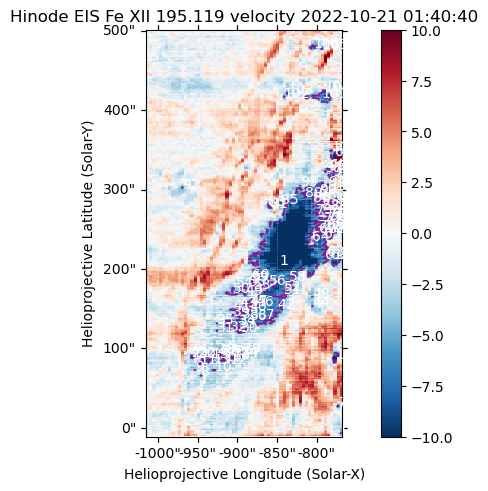

In [4]:
fig = plt.figure(layout='constrained')

ax = fig.add_subplot(111, projection=eis_1021_FeXII_195_velmap)
eis_1021_FeXII_195_velmap.plot(axes=ax)

cs_1021 = eis_1021_FeXII_195_velmap.draw_contours(levels=[-5,]*eis_1021_FeXII_195_velmap.unit,colors=["purple"],axes=ax,alpha=0.8)
plt.colorbar()

for ii, seg in enumerate(cs_1021.allsegs[0]):
    ax.text(np.nanmean(seg, axis=0)[0], np.nanmean(seg, axis=0)[1], f'{ii}', color='white', fontsize=10)

# ax.set_xlim(0,20)
# ax.set_ylim(150,350)

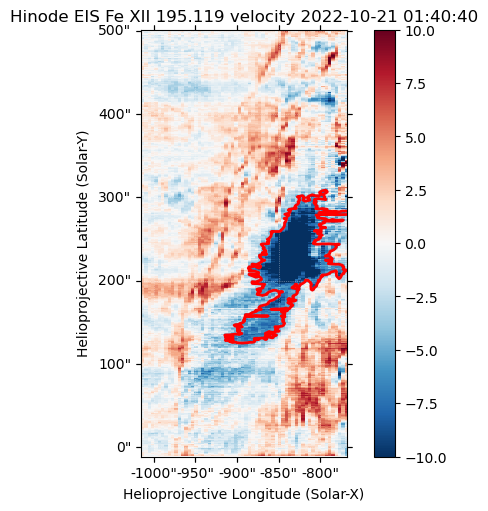

In [5]:
cs_1021_selected_index = [1,2]
    
fig = plt.figure(figsize=(7, 5),layout='constrained')
ax = fig.add_subplot(111, projection=eis_1021_FeXII_195_velmap)
eis_1021_FeXII_195_velmap.plot(axes=ax)
plt.colorbar()

for ii in cs_1021_selected_index:
    ax.plot(*cs_1021.allsegs[0][ii].T, color='red', lw=2)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


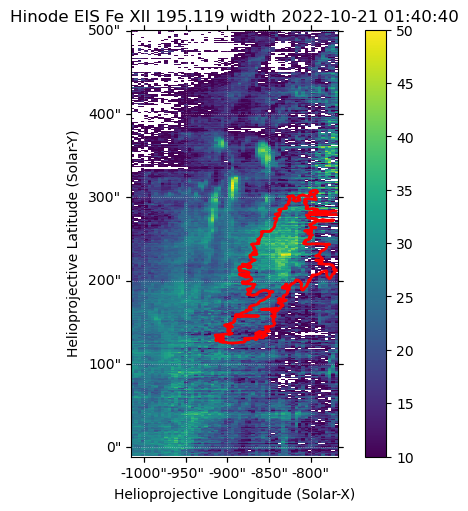

In [6]:
fig = plt.figure(figsize=(7, 5),layout='constrained')
ax = fig.add_subplot(111, projection=eis_1021_FeXII_195_vnthmap)
eis_1021_FeXII_195_vnthmap.plot(axes=ax,vmin=10,vmax=50)
plt.colorbar()

for ii in cs_1021_selected_index:
    ax.plot(*cs_1021.allsegs[0][ii].T, color='red', lw=2)

In [7]:
cs_1021_skycoords = [eis_1021_FeXII_195_velmap.pixel_to_world(np.concatenate((cs_1021.allsegs[0][cs_1021_selected_index[0]][:,0],
                                                                    cs_1021.allsegs[0][cs_1021_selected_index[1]][:,0]))*u.pix,
                                                    np.concatenate((cs_1021.allsegs[0][cs_1021_selected_index[0]][:,1],
                                                                    cs_1021.allsegs[0][cs_1021_selected_index[1]][:,1]))*u.pix) \
                ]
cs_1021_regions = [PolygonSkyRegion(vertices=cs_1021_skycoord) for cs_1021_skycoord in cs_1021_skycoords]

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


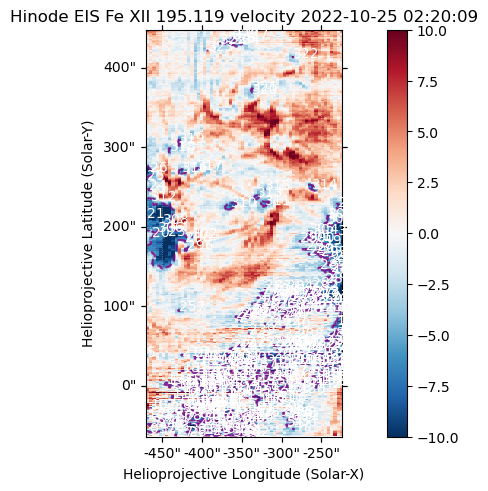

In [8]:
fig = plt.figure(layout='constrained')

ax = fig.add_subplot(111, projection=eis_1025_FeXII_195_velmap)
eis_1025_FeXII_195_velmap.plot(axes=ax)

cs_1025 = eis_1025_FeXII_195_velmap.draw_contours(levels=[-5,]*eis_1025_FeXII_195_velmap.unit,colors=["purple"],axes=ax,alpha=0.8)
plt.colorbar()

for ii, seg in enumerate(cs_1025.allsegs[0]):
    ax.text(np.nanmean(seg, axis=0)[0], np.nanmean(seg, axis=0)[1], f'{ii}', color='white', fontsize=10)

# ax.set_xlim(0,20)
# ax.set_ylim(150,350)

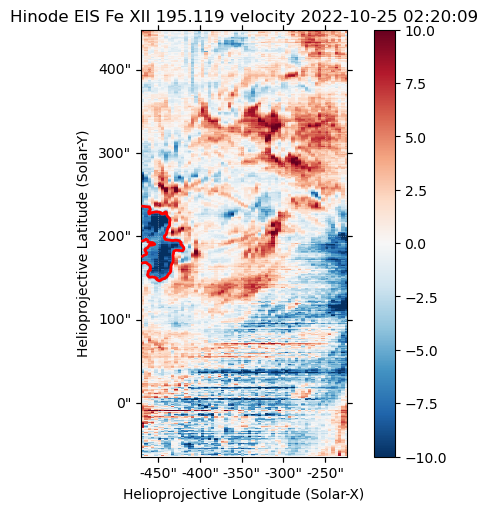

In [9]:
cs_1025_selected_index = [20,23]
    
fig = plt.figure(figsize=(7, 5),layout='constrained')
ax = fig.add_subplot(111, projection=eis_1025_FeXII_195_velmap)
eis_1025_FeXII_195_velmap.plot(axes=ax)
plt.colorbar()

for ii in cs_1025_selected_index:
    ax.plot(*cs_1025.allsegs[0][ii].T, color='red', lw=2)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


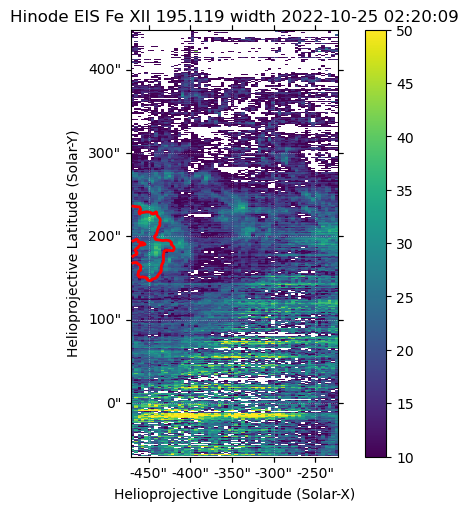

In [10]:
fig = plt.figure(figsize=(7, 5),layout='constrained')
ax = fig.add_subplot(111, projection=eis_1025_FeXII_195_vnthmap)
eis_1025_FeXII_195_vnthmap.plot(axes=ax,vmin=10,vmax=50)
plt.colorbar()

for ii in cs_1025_selected_index:
    ax.plot(*cs_1025.allsegs[0][ii].T, color='red', lw=2)

In [11]:
cs_1025_skycoords = [eis_1025_FeXII_195_velmap.pixel_to_world(np.concatenate((cs_1025.allsegs[0][cs_1025_selected_index[0]][:,0],
                                                                    cs_1025.allsegs[0][cs_1025_selected_index[1]][:,0]))*u.pix,
                                                    np.concatenate((cs_1025.allsegs[0][cs_1025_selected_index[0]][:,1],
                                                                    cs_1025.allsegs[0][cs_1025_selected_index[1]][:,1]))*u.pix) \
                ]
cs_1025_regions = [PolygonSkyRegion(vertices=cs_1025_skycoord) for cs_1025_skycoord in cs_1025_skycoords]

In [12]:
def get_vnth_from_cs_regions(vnth_map, cs_regions):
    intensity = []
    masks = [np.where(cs_region.contains(sunpy.map.all_coordinates_from_map(vnth_map), 
                                                vnth_map.wcs)) for cs_region in cs_regions]
    intensity = [vnth_map.data[mask_] for mask_ in masks]
    return intensity

In [13]:
vnth_west_upflow_1021 = get_vnth_from_cs_regions(eis_1021_FeXII_195_vnthmap, cs_1021_regions)
vnth_east_upflow_1025 = get_vnth_from_cs_regions(eis_1025_FeXII_195_vnthmap, cs_1025_regions)

west: 26.26164702862691 km/s east: 26.13430894906217 km/s


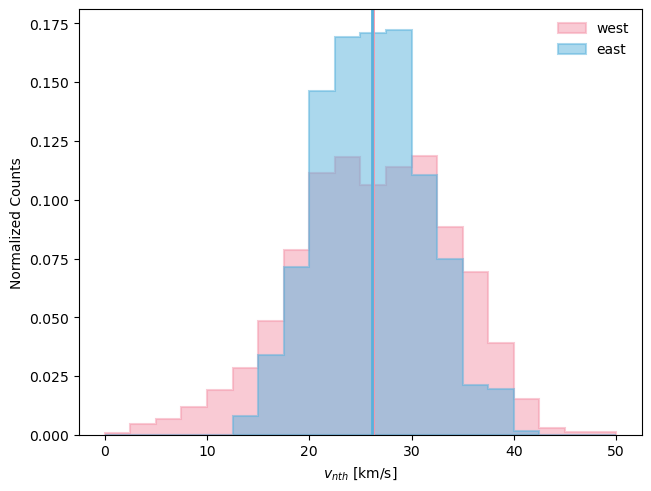

In [15]:
fig, ax = plt.subplots(layout='constrained')

ax.hist(vnth_west_upflow_1021[0], bins=20,range=(0,50), alpha=0.5, label='west',
        facecolor=(245./255,150./255,170./255,0.3),lw=1.5,
                ls="-",edgecolor=(245./255,150./255,170./255,1),histtype="stepfilled",
                weights=np.ones_like(vnth_west_upflow_1021[0])/len(vnth_west_upflow_1021[0]))
ax.axvline(np.nanmean(vnth_west_upflow_1021[0]), color='#F596AA', lw=2)

ax.hist(vnth_east_upflow_1025[0], bins=20,range=(0,50), alpha=0.5, label='east',
        facecolor=(88./255,178./255,220./255,0.3),lw=1.5,
                ls="-",edgecolor=(88./255,178./255,220./255,1.),histtype="stepfilled",
                weights=np.ones_like(vnth_east_upflow_1025[0])/len(vnth_east_upflow_1025[0]))
ax.axvline(np.nanmean(vnth_east_upflow_1025[0]), color='#58B2DC', lw=2)

ax.legend(loc='upper right',frameon=False)
ax.set_xlabel(r'$v_{nth}$ [km/s]')
ax.set_ylabel('Normalized Counts')
print(f'west: {np.nanmean(vnth_west_upflow_1021[0])} km/s',
      f'east: {np.nanmean(vnth_east_upflow_1025[0])} km/s')